In [1]:
import feather
import pandas as pd
import numpy as np
import sys
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import scipy
register_matplotlib_converters()
%matplotlib inline

In [2]:
sys.path.append("..")
import helpers

In [3]:
df_train = feather.read_dataframe("data/df_train.feather")

In [4]:
df_train.columns

Index(['_id', 'price', 'flat_size', 'rooms', 'floor', 'number_of_floors',
       'year_of_building', 'GC_latitude', 'GC_longitude', 'producer_name',
       'GC_addr_road', 'GC_addr_neighbourhood', 'GC_addr_suburb',
       'GC_addr_city', 'GC_addr_state', 'GC_addr_postcode', 'GC_addr_country',
       'description', 'name', 'download_date', 'info'],
      dtype='object')

# Numeric

## flat_size

### Outliers

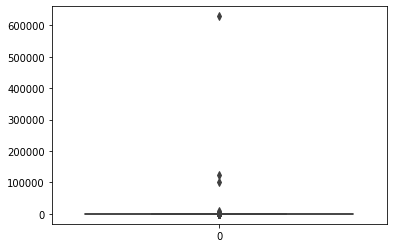

In [5]:
sns.boxplot(data=df_train.flat_size)

In [6]:
from sklearn.cluster import DBSCAN

def outlier_detection(data_df_series):
    outliers_detect = DBSCAN(min_samples = 2, eps = 3)
    clusters = outliers_detect.fit_predict((np.array(data_df_series)).reshape(-1, 1))
    indexes = np.where(clusters==-1)[0]
    values = data_df_series.loc[indexes].values
    return indexes, values


In [7]:
outliers_indexes, outliers_values = outlier_detection(df_train.flat_size)

In [8]:
print("Outliers values by DBSCAN: {}".format(", ".join([str(i) for i in sorted(outliers_values)])))

Outliers values by DBSCAN: 6, 216, 270, 280, 585, 8289, 101000, 125000, 628618


In [9]:
med = np.median(df_train.flat_size)
exclude_gt = min([i for i in outliers_values if i > med])
exclude_lt = max([i for i in outliers_values if i < med])

#save 
outliers = {}
outliers['flat_size']= {"min": exclude_lt, "max": exclude_gt}
outliers

print("Exclude when flat size less then {}, and more then {}".format(exclude_lt, exclude_gt))

Exclude when flat size less then 6, and more then 216


### Missing

In [10]:
Counter(df_train.flat_size.isna())

Counter({False: 31060})

### Plot

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

[Text(0, 0.5, 'price in pln'), Text(0.5, 0, 'flat size')]

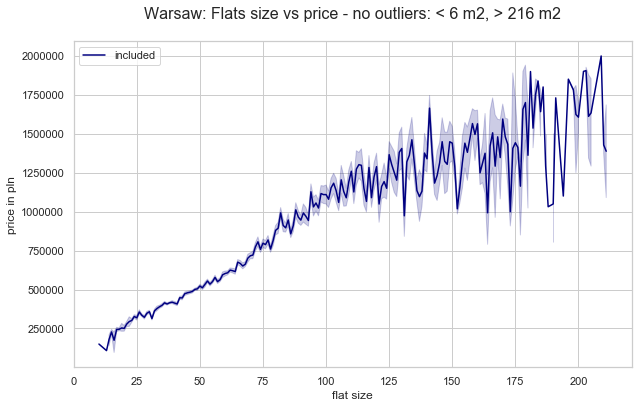

In [11]:
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10,6))

sns.lineplot(data=df_train.query("flat_size>{} and flat_size<{}".format(exclude_lt,exclude_gt)),
             x='flat_size', y='price',ax=ax1,color='navy',label='included')

plt.title('Warsaw: Flats size vs price - no outliers: < {} m2, > {} m2'.format(exclude_lt,exclude_gt), y=1.05, fontsize = 16)
ax1.set(xlabel='flat size', ylabel='price in pln')


## GC_longitude

### Outliers

Polands longitude is between 14 and 24

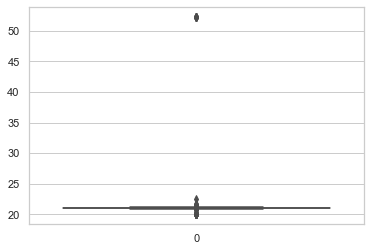

In [12]:
sns.boxplot(data=df_train.GC_longitude)

In [13]:
print(Counter(df_train.GC_longitude > 21.5))
print(Counter(df_train.GC_longitude < 20.5))

Counter({False: 31047, True: 13})
Counter({False: 31034, True: 26})


In [14]:
outliers['GC_longitude'] = {"min":20.5,"max":21.5}

### Missing

In [15]:
Counter(df_train.GC_longitude.isna())

Counter({False: 31060})

### Plot

[Text(0, 0.5, 'price'), Text(0.5, 0, 'GC_longitude')]

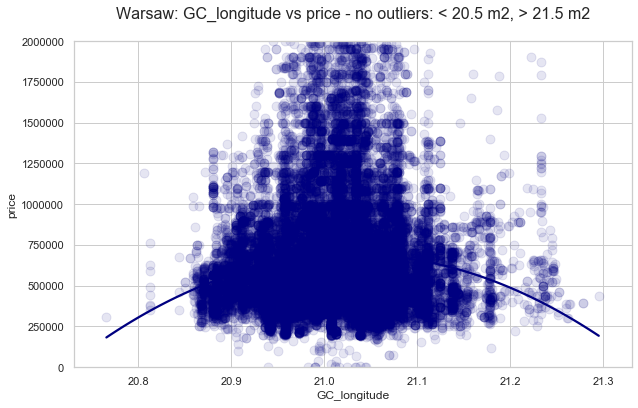

In [16]:
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10,6))

plt.ylim(0,2000000)
sns.regplot(data=df_train.query("GC_longitude>={} and GC_longitude<={}".format(
        outliers['GC_longitude']['min'],
        outliers['GC_longitude']['max'])),
             x='GC_longitude', y='price',ax=ax1,color='navy',label='included',scatter_kws={"s": 80, "alpha":0.1},
           order=2, ci=None, truncate=True)

plt.title('Warsaw: GC_longitude vs price - no outliers: < {} m2, > {} m2'.format(
    outliers['GC_longitude']['min'],outliers['GC_longitude']['max']), y=1.05, fontsize = 16)
ax1.set(xlabel='GC_longitude', ylabel='price')

## GC_longitude

Polands longitude is between 49 and 55

### Outliers

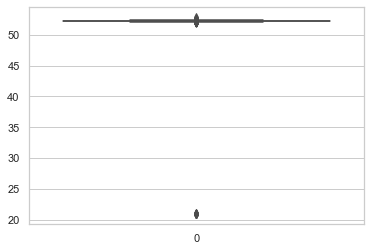

In [17]:
sns.boxplot(data=df_train.GC_latitude)

In [18]:
outliers['GC_latitude'] = {"min":51,"max":52.5}

### Missing


In [19]:
Counter(df_train.GC_latitude.isna())

Counter({False: 31060})

### Plot

[Text(0, 0.5, 'price'), Text(0.5, 0, 'GC_latitude')]

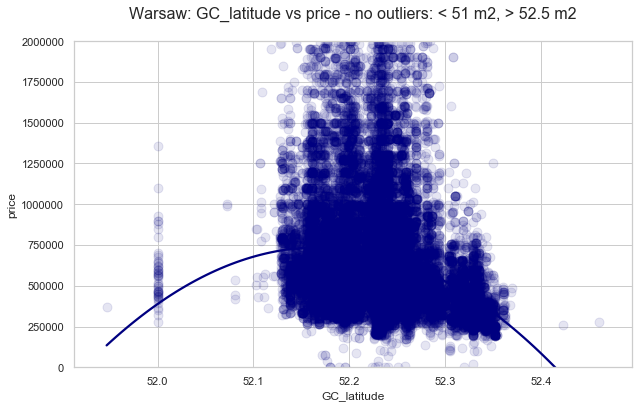

In [20]:
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10,6))

plt.ylim(0,2000000)
sns.regplot(data=df_train.query("GC_latitude>={} and GC_latitude<={}".format(
        outliers['GC_latitude']['min'],
        outliers['GC_latitude']['max'])),
             x='GC_latitude', y='price',ax=ax1,color='navy',label='included',scatter_kws={"s": 80, "alpha":0.1},
           order=2, ci=None, truncate=True)

plt.title('Warsaw: GC_latitude vs price - no outliers: < {} m2, > {} m2'.format(
    outliers['GC_latitude']['min'],outliers['GC_latitude']['max']), y=1.05, fontsize = 16)
ax1.set(xlabel='GC_latitude', ylabel='price')

## rooms

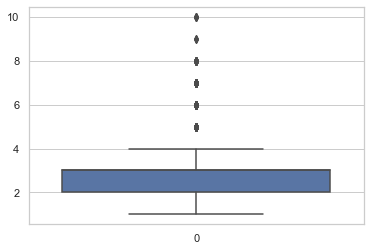

In [21]:
sns.boxplot(data=df_train.rooms)


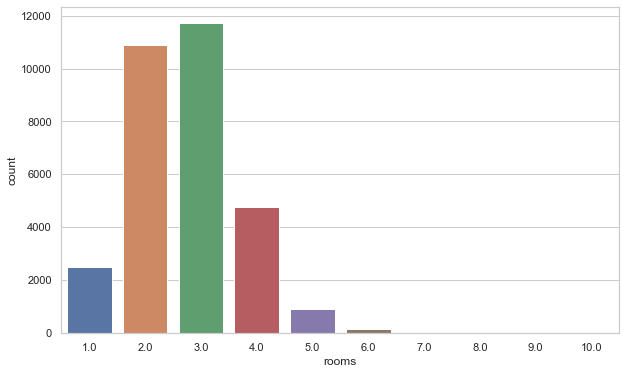

In [22]:
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10,6))

sns.countplot(df_train.rooms)

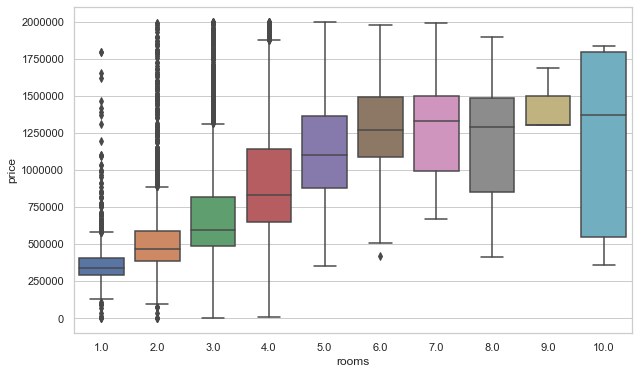

In [23]:
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10,6))

sns.boxplot(data=df_train, x='rooms',y='price')

## year_of_building

### missing

In [24]:
print("Missing values of 'year_of_building' is {0:.0%} percent".format(
    sum(df_train.year_of_building.isna())/len(df_train.year_of_building.isna())))


Missing values of 'year_of_building' is 17% percent


In [25]:
outliers_indexes, outliers_values = outlier_detection(
    df_train.loc[df_train.year_of_building.notna()].reset_index(drop=True).year_of_building)

In [26]:
print("Outliers values by DBSCAN: {}".format(", ".join([str(i) for i in sorted(outliers_values)])))

Outliers values by DBSCAN: 60.0, 76.0, 200.0, 976.0, 1017.0, 1029.0, 1092.0, 1660.0, 1669.0, 1815.0, 20000.0, 20119.0


In [27]:
med = np.median(df_train.loc[df_train.year_of_building.notna()].reset_index(drop=True).year_of_building)
exclude_gt = min([i for i in outliers_values if i > med])
exclude_lt = max([i for i in outliers_values if i < med])

#save 
outliers['year_of_building']= {"min": exclude_lt, "max": exclude_gt}

print("Exclude when year_of_building less then {}, and more then {}".format(exclude_lt, exclude_gt))

Exclude when year_of_building less then 1815.0, and more then 20000.0


[Text(0, 0.5, 'price in pln'), Text(0.5, 0, 'flat size')]

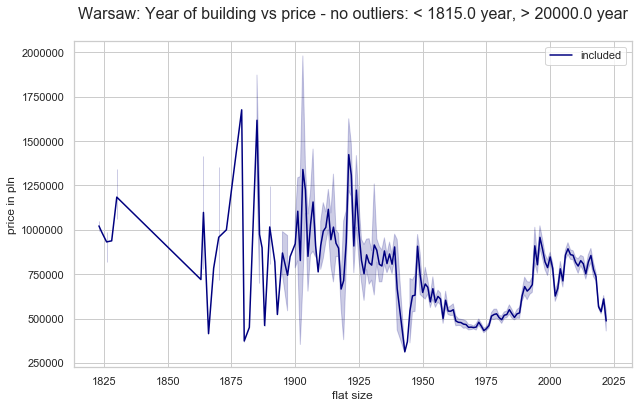

In [28]:
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10,6))

sns.lineplot(data=df_train.loc[df_train.year_of_building.notna()].query(
                "year_of_building>{} and year_of_building<{}".format(exclude_lt,exclude_gt)),
             x='year_of_building', y='price',ax=ax1,color='navy',label='included')

plt.title('Warsaw: Year of building vs price - no outliers: < {} year, > {} year'.format(exclude_lt,exclude_gt), y=1.05, fontsize = 16)
ax1.set(xlabel='flat size', ylabel='price in pln')

# Category

## GC_addr_postcode

In [29]:
print("number of unique values: {}".format(len(df_train.GC_addr_postcode.unique())))


number of unique values: 2297


###  Missing

In [30]:
Counter(df_train.GC_addr_postcode.isna())

Counter({False: 30861, True: 199})

In [31]:
Counter(df_train.GC_addr_postcode=="")

Counter({False: 31060})

### target encoding

Choose target encoder, later using hyper opt
```
from category_encoders import WOEEncoder, TargetEncoder, CatBoostEncoder, BackwardDifferenceEncoder
from category_encoders import BinaryEncoder,LeaveOneOutEncoder,PolynomialEncoder,SumEncoder
```


## GC_addr_suburb

### Missing

In [32]:
Counter(df_train.GC_addr_suburb.isna())

Counter({False: 30908, True: 152})

[Text(0, 0.5, 'price'), Text(0.5, 0, 'GC_addr_suburb')]

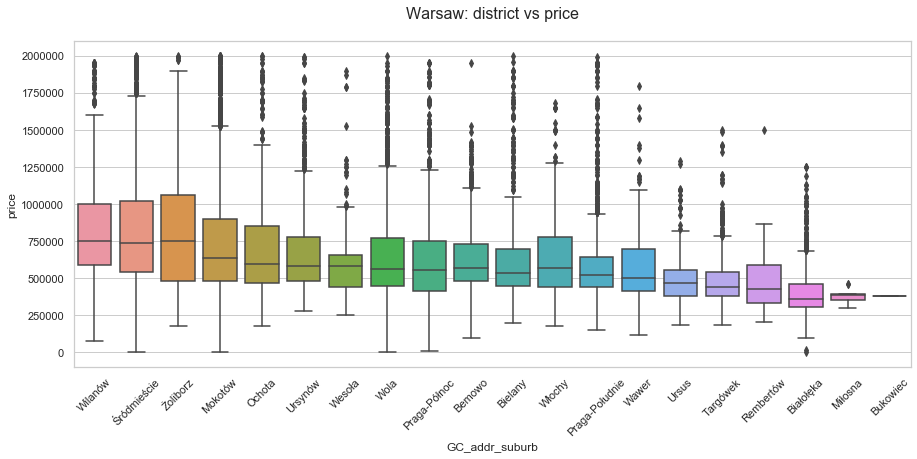

In [33]:
order_list = df_train.groupby('GC_addr_suburb')[['GC_addr_suburb','price']] \
    .agg('mean').reset_index().sort_values('price',ascending=False)['GC_addr_suburb'].tolist()

sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(15,6))

sns.boxplot(data=df_train, x='GC_addr_suburb',y='price',order=order_list, orient='v')

plt.title('Warsaw: district vs price',y=1.05, fontsize = 16)


plt.xticks(rotation=45)
ax1.set(xlabel='GC_addr_suburb', ylabel='price')

## description

In [34]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import lightgbm as lgb

#import eli5


/Users/xszpo/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [55]:
params = {'colsample_bytree': 0.6624318354159208, #feature_fraction
 'learning_rate': 0.15990411055449805,
 'max_bin': 38712,
 'max_depth': 7,
 'min_child_samples': 84, #min_data_in_leaf
 'min_child_weight': 6, #min_sum_hessian_in_leaf
 'n_estimators': 206, #num_iterations
 'num_leaves': 159,
 'reg_alpha': 3.960667919705787e-06, #lambda_l1
 'reg_lambda': 499.85995495490215, #lambda_l2
 'subsample': 0.9022680042341511, #bagging_fraction
 'subsample_for_bin': 144116, #bin_construct_sample_cnt
 'subsample_freq': 0 #bagging_freq
         } 
pipe = make_pipeline(
    ColumnTransformer([
        ('txt_description', TfidfVectorizer(lowercase=True,
                                     ngram_range=(1, 3),
                                     max_features=1000,
                                     dtype=np.float32,
                                     use_idf=True), 'description'),
    ]),
    lgb.LGBMRegressor(**params, objective='regression_l2', random_state=666)
)

In [56]:
%%time
pipe.fit(df_train, df_train.price)


CPU times: user 2min 32s, sys: 6.16 s, total: 2min 38s
Wall time: 1min 24s


Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('txt_description', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float32'>, encoding='utf...     silent=True, subsample=0.9022680042341511, subsample_for_bin=144116,
       subsample_freq=0))])

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.metrics import r2_score, median_absolute_error
y_pred = pipe.predict(df_train)

r2 = r2_score(df_train.price, y_pred)
med_abs_err = median_absolute_error(df_train.price, y_pred)
mean_abs_err = mean_absolute_error(df_train.price, y_pred)
print("Train set r2 score {}, median absolute error {}, "
      "mean absolute error {}".format(round(r2, 4), int(med_abs_err),
                                      int(mean_abs_err)))

Train set r2 score 0.7293, median absolute error 82788, mean absolute error 120131


In [58]:
from eli5 import show_weights, explain_weights_lightgbm
explain_weights_lightgbm(pipe.named_steps['lgbmregressor'], 
             feature_names = pipe.named_steps['columntransformer'].get_feature_names(),
             top=50,)

Weight,Feature
0.2381,txt_description__apartament
0.0522,txt_description__garderoba
0.0269,txt_description__apartamentu
0.0263,txt_description__taras
0.0241,txt_description__jadalnia
0.0212,txt_description__kamienicy
0.0178,txt_description__garazu
0.0176,txt_description__sypialnie
0.0141,txt_description__podziemnym
0.0127,txt_description__mieszkanie


## info

In [59]:
params = {'colsample_bytree': 0.6624318354159208, #feature_fraction
 'learning_rate': 0.15990411055449805,
 'max_bin': 38712,
 'max_depth': 7,
 'min_child_samples': 84, #min_data_in_leaf
 'min_child_weight': 6, #min_sum_hessian_in_leaf
 'n_estimators': 206, #num_iterations
 'num_leaves': 159,
 'reg_alpha': 3.960667919705787e-06, #lambda_l1
 'reg_lambda': 499.85995495490215, #lambda_l2
 'subsample': 0.9022680042341511, #bagging_fraction
 'subsample_for_bin': 144116, #bin_construct_sample_cnt
 'subsample_freq': 0 #bagging_freq
         } 
pipe = make_pipeline(
    ColumnTransformer([
        ('txt_info', TfidfVectorizer(lowercase=True,
                                     ngram_range=(1, 3),
                                     max_features=1000,
                                     dtype=np.float32,
                                     use_idf=True), 'info'),
    ]),
    lgb.LGBMRegressor(**params, objective='regression_l2', random_state=666)
)

In [60]:
%%time
pipe.fit(df_train, df_train.price)


CPU times: user 38.5 s, sys: 1.57 s, total: 40.1 s
Wall time: 14.3 s


Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('txt_info', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float32'>, encoding='utf-8', in...     silent=True, subsample=0.9022680042341511, subsample_for_bin=144116,
       subsample_freq=0))])

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.metrics import r2_score, median_absolute_error
y_pred = pipe.predict(df_train)

r2 = r2_score(df_train.price, y_pred)
med_abs_err = median_absolute_error(df_train.price, y_pred)
mean_abs_err = mean_absolute_error(df_train.price, y_pred)
print("Train set r2 score {}, median absolute error {}, "
      "mean absolute error {}".format(round(r2, 4), int(med_abs_err),
                                      int(mean_abs_err)))

Train set r2 score 0.373, median absolute error 136836, mean absolute error 189699


In [62]:
from eli5 import show_weights, explain_weights_lightgbm
explain_weights_lightgbm(pipe.named_steps['lgbmregressor'], 
             feature_names = pipe.named_steps['columntransformer'].get_feature_names(),
             top=50,)

Weight,Feature
0.1272,txt_info__building_type blok
0.1173,txt_info__market pierwotny
0.0718,txt_info__blok
0.0624,txt_info__apartamentowiec
0.0403,txt_info__drewniane
0.0303,txt_info__plastikowe
0.0286,txt_info__taras
0.0226,txt_info__pierwotny
0.0205,txt_info__winda
0.0193,txt_info__kamienica
